In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

Let $\Omega \subset \mathbb{R}^2$ and $\Sigma \subset \mathbb{R}^2$. Compute the Fréchet derivatives of the following functionals:

* $J(u) = \frac{1}{2} \left\| \nabla u \right\|_{L^2(\Omega)}^2$ where $u \in W^{1,2}(\Omega)$.
* $J(u) = \frac{1}{2} \left\| Ku-f \right\|_{L^2(\Sigma)}^2$ where $K: L^2(\Omega) \rightarrow L^2(\Sigma)$ is a compact linear operator, $u : \Omega \rightarrow \mathbb{R}$ and $f : \Sigma \rightarrow \mathbb{R}$.
* $J(\mathbf{v}) = \frac{1}{2} \left\| \partial_t f + \nabla\cdot(f \mathbf{v}) \right\|_{L^2(\Omega \times [0,T])}^2$ 
	where $f$ here represents an image sequence, i.e. $f: \Omega \times [0,T] \rightarrow \mathbb{R}$, and $\mathbf{v}$ denotes a desired vector field, i.e. $\mathbf{v}: \Omega \times [0,T] \rightarrow \mathbb{R}^2$.


The Fréchet derivative of $J : U \rightarrow \mathbb{R}$ is defined as the bounded linear operator $DJ(u)$ satisfying
$$\lim_{\|h\|\rightarrow 0} \frac{|J(u + h) - J(u) - DJ(u) h|}{\|h\|_{U}} = 0.$$

We have $J(u + h) = \textstyle{\frac{1}{2}}\|\nabla u + \nabla h\|^2 = \textstyle{\frac{1}{2}}\|\nabla u\|^2 +  \int_{\Omega}\nabla u(x) \cdot \nabla h(x) \mathrm{d}x + \textstyle{\frac{1}{2}}\|\nabla h\|^2$. This suggests that $DJ(u) : U \rightarrow \mathbb{R}$ can be defined as $DJ(u)v = \int_{\Omega}\nabla u(x) \cdot \nabla v(x) \mathrm{d}x$. Indeed, we can verify that
$$\lim_{\|h\|\rightarrow 0} \frac{\left| \int_{\Omega}\nabla h (x) \cdot \nabla h(x)\mathrm{d}x \right|}{\sqrt{\int_{\Omega} |h(x)|^2 + |\nabla h(x) \cdot \nabla h(x) | \mathrm{d}x}} = 0.$$

We have $J(u+h) = J(u) + \langle Ku - f, Kv \rangle + \textstyle{\frac{1}{2}}\|Kv\|^2.$ This suggests letting $DJ(u)v = \langle Ku - f, Kv\rangle = \langle K^*(Ku - f), v\rangle$. Indeed
$$\lim_{\|h\|\rightarrow 0}\frac{\|Kh\|^2_{L^2}}{\|h\|_{L^2}} = 0,$$
because $K$ is bounded.

Here, we have $J(\mathbf{v} + \mathbf{h}) = J(\mathbf{v}) + \langle \partial_t f + \nabla \cdot (f\mathbf{v}),  \nabla \cdot (f\mathbf{h})\rangle + \textstyle{\frac{1}{2}}\|\nabla \cdot (f\mathbf{h})\|^2$, suggesting
$$DJ(\mathbf{v})\mathbf{h} = \int_0^T \int_{\Omega} \left(\partial_t f(x,t) + \nabla \cdot (f(x,t)\mathbf{v}(x,t))\right)\left(\nabla \cdot (f(x,t)\mathbf{v}(x,t))\right) \mathrm{d}t\mathrm{d}x$$

## Exercise 2

Consider the Tikhonov functional for denoising (in $\mathbb{R}^n$):
$$\min\limits_x\frac{1}{2}\left\|x-y\right\|_2^2 + \frac{\alpha}{2}\left\|x\right\|_2^2.$$

* Give the solution of this variational problem explicitly.
* Generate in Python a random 1x128 vector with 5 non-zero coefficients (entries) and add aussian noise with standard deviation $\sigma = 0.05$ (see example below)
* Denoise the vector by solving the variational problem. What happens for different regularisation parameters $\alpha = \left\{0.01, 0.05, 0.1, 0.2\right\}$?. Consider in particular $\alpha=0.1$. *Is the solution sparse?*

The solution is given by $$x = (1 + \alpha)^{-1}y.$$

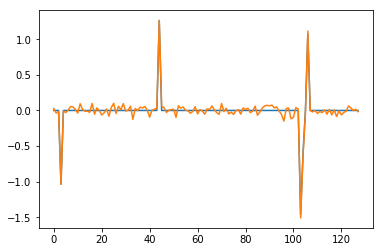

In [4]:
n = 128
k = 5
sigma = 0.05

x = np.zeros(n)
x[np.random.randint(128,size=k)]=np.random.randn(k)
y = x + sigma*np.random.randn(n)
plt.plot(x)
plt.plot(y)

In [5]:
x1 = y/(1 + 0.01)
x2 = y/(1 + 0.05)
x3 = y/(1 + 0.1)
x4 = y/(1 + 0.2)

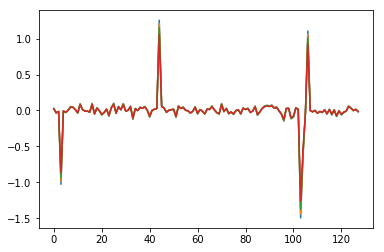

In [6]:
plt.plot(x1,label='0.01')
plt.plot(x2,label='0.05')
plt.plot(x3,label='0.1')
plt.plot(x4,label='0.2')

We see that Tikhonov regularization does nothing to reduce the noise for spiky signals

## Exercise 3

Repeat exercise 2 for
$$\min_x\frac{1}{2}\left\|x-y\right\|_2^2 + \alpha\left\|x\right\|_1$$

The exact solution known as *soft tresholding*. A derivation can be found [here](https://math.stackexchange.com/questions/471339/derivation-of-soft-thresholding-operator-proximal-operator-of-l-1-norm)

In [12]:
def soft(y,alpha):
    return np.sign(y)*np.maximum(np.abs(y) - alpha,0)

In [15]:
x1 = soft(y,0.01)
x2 = soft(y,0.05)
x3 = soft(y,0.1)
x4 = soft(y,0.2)

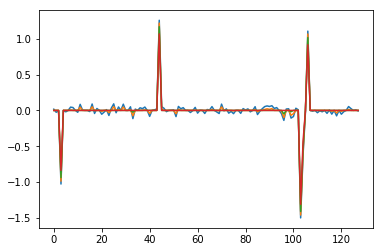

In [17]:
plt.plot(x1,label='0.01')
plt.plot(x2,label='0.05')
plt.plot(x3,label='0.1')
plt.plot(x4,label='0.2')

We note that this operation does remove the noise and leaves the spikes.